In [84]:
import numpy as np
from graphviz import Digraph, Graph
from typing import Optional
from collections import deque

In [154]:
class Node():
    def __init__(self, name, value):
        self.value = value
        self.name = name
        self.neighbors = list()
        
class Graph():
    def __init__(self):
        self.nodes = list()
    

# Undirected Graphs

In [190]:
def build_undir_graph():
    node_a = Node("A", 0)
    node_b = Node("B", 1)
    node_c = Node("C", 2)
    node_d = Node("D", 3)
    node_e = Node("E", 4)
    node_f = Node("F", 5)
    node_g = Node("G", 6)
    node_h = Node("H", 7)
    node_j = Node("J", 8)

    node_a.neighbors.extend([node_b, node_g, node_c])
    node_b.neighbors.extend([node_a, node_d])
    node_c.neighbors.extend([node_a, node_g, node_f])
    node_d.neighbors.extend([node_b, node_g, node_h])
    node_g.neighbors.extend([node_a, node_d, node_c, node_j])
    node_h.neighbors.extend([node_d, node_j])
    node_f.neighbors.extend([node_c, node_j])
    node_j.neighbors.extend([node_h, node_g, node_f])
    
    graph = Graph()
    graph.nodes.extend([node_a, node_b, node_c, node_d, node_e, node_f, node_g, node_h, node_j])
    return graph

def build_undir_no_cycle():
    node_a = Node("A", 0)
    node_b = Node("B", 1)
    node_c = Node("C", 2)
    node_d = Node("D", 3)

    node_a.neighbors.extend([node_b])
    node_b.neighbors.extend([node_a, node_c, node_d])
    node_c.neighbors.extend([node_b])
    node_d.neighbors.extend([node_b])
    graph = Graph()
    graph.nodes.extend([node_a, node_b, node_c, node_d])
    return graph

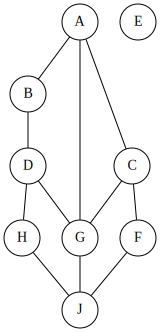

In [151]:
grf = Graph(format="png", graph_attr={'nodesep': '.3'})
grf.node("0", "A", shape="circle", fixedsize="true")
grf.node("1", "B", shape="circle", fixedsize="true")
grf.node("2", "C", shape="circle", fixedsize="true")
grf.node("3", "D", shape="circle", fixedsize="true")
grf.node("4", "E", shape="circle", fixedsize="true")
grf.node("5", "F", shape="circle", fixedsize="true")
grf.node("6", "G", shape="circle", fixedsize="true")
grf.node("7", "H", shape="circle", fixedsize="true")
grf.node("8", "J", shape="circle", fixedsize="true")

grf.edge("0" ,"1")
grf.edge("0" ,"2")
grf.edge("0" ,"6")
grf.edge("1" ,"3")
grf.edge("2" ,"6")
grf.edge("2" ,"5")
grf.edge("3" ,"6")
grf.edge("3" ,"7")
grf.edge("6" ,"8")
grf.edge("7" ,"8")
grf.edge("5" ,"8")

grf

In [196]:
def breadth_first_search(name, graph, node=None) -> Optional[Node]:
    queue = list()
    node = node if node is not None else graph.nodes[0]
    marked = set()
    queue.insert(0, node)
    
    while len(queue) > 0:
        node = queue.pop()
        if node.name == name:
            return node
        for n in node.neighbors:
            if n not in marked:
                marked.add(n)
                queue.insert(0, n)
            
    return None

udir_graph = build_undir_graph()
found_node = breadth_first_search("G", udir_graph)
print(found_node.name)

found_node = breadth_first_search("E", udir_graph)
print(found_node)

G
None


In [160]:
def depth_first_search(name, graph) -> Optional[Node]:
    marked = set()
    def _dfs(node, name):
        marked.add(node)
        if node.name == name:
            return node
        
        found = None
        for n in node.neighbors:
            if n not in marked and found is None:
                found = _dfs(n, name)
                if found is not None:
                    break
    
        return found
    
    node_ = graph.nodes[0]
    found_node = _dfs(node_, name)
    return found_node

found_node = depth_first_search("F", udir_graph)
print(found_node.name)

found_node = depth_first_search("E", udir_graph)
print(found_node)

F
None


In [167]:
def bfs_path_between_nodes(name1, name2, graph):
    parents = dict()
    node_queue = deque()
    
    node1 = None
    node2 = None
    for n in graph.nodes:
        if n.name == name1:
            node1 = n
        elif n.name == name2:
            node2 = n
    if node1 is None or node2 is None:
        return [], -1
    
    marked = set([node1])
    node_queue.appendleft((node1, 0))
    while len(node_queue) > 0:
        n, cost = node_queue.pop()        
        for nbr in n.neighbors:
            if nbr not in marked:
                marked.add(nbr)
                parents[nbr] = (n, cost+1)
                node_queue.appendleft((nbr, cost+1))
    
    # if disconnected graph
    if node2 not in parents:
        return [], -1
                
    path = [node2.name]
    n = node2
    while n != node1: 
        n, c = parents.get(n)
        path.insert(0, n.name)
    
    return path, parents[node2][1]

In [169]:
bfs_path_between_nodes("A", "H", udir_graph)

(['A', 'B', 'D', 'H'], 3)

In [193]:
def detect_cycle(graph):
    marked = set()
    
    def _dfs(node, parent):
        marked.add(node)
        for nbr in node.neighbors:
            if nbr not in marked:
                if _dfs(nbr, node) is True: return True
            elif nbr != parent:
                return True
        
        return False
                
    node = graph.nodes[0]
    return _dfs(node, None)

In [194]:
print(detect_cycle(udir_graph))
print(detect_cycle(build_undir_no_cycle()))

True
False


# Directed Graphs

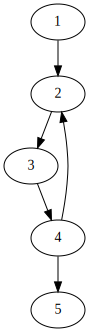

In [199]:
dgrf = Digraph()
dgrf.node("1", "1")
dgrf.node("2", "2")
dgrf.node("3", "3")
dgrf.node("4", "4")
dgrf.node("5", "5")

dgrf.edge("1", "2")
dgrf.edge("2", "3")
dgrf.edge("3", "4")
dgrf.edge("4", "2")
dgrf.edge("4", "5")

dgrf

In [201]:
def build_dir_graph():
    node_a = Node("A", 0)
    node_b = Node("B", 1)
    node_c = Node("C", 2)
    node_d = Node("D", 3)
    node_e = Node("E", 4)
        

    node_a.neighbors.extend([node_b])
    node_b.neighbors.extend([node_c])
    node_c.neighbors.extend([node_d])
    node_d.neighbors.extend([node_b, node_e])
    
    graph = Graph()
    graph.nodes.extend([node_a, node_b, node_c, node_d, node_e])
    return graph

In [202]:
detect_cycle(build_dir_graph())

True